In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#declarations
data = pd.DataFrame

In [4]:
def read_file(data):
    data = pd.read_csv("C:/Users/Admin/Documents/ironhack/certification_project/data/clean/clean_data.csv")
    data.info()
    return data

In [5]:
data = read_file(data).copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2772 non-null   int64  
 1   country                   2772 non-null   object 
 2   people                    2766 non-null   object 
 3   obesity_levels            2766 non-null   object 
 4   obesity_level_percentage  2766 non-null   object 
 5   date                      2766 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 130.1+ KB


#### Country exploration 

In [6]:
display(data['country'].unique())

array(['American Samoa', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium',
       'Benin', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Egypt', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kiribati', 'Kuwait', "Lao People's Democratic Republic", 'Latvia',
       'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Madagascar',
       'Malawi', 'Malaysia', 'Mali',

In [7]:
data['country'].value_counts()

United States of America    92
Finland                     75
Norway                      75
Australia                   68
Canada                      62
                            ..
Slovenia                     3
Kazakhstan                   3
Guatemala                    3
Cote d'Ivoire                3
Tonga                        2
Name: country, Length: 129, dtype: int64

In [8]:
data['country'].describe().T

count                         2772
unique                         129
top       United States of America
freq                            92
Name: country, dtype: object

### People 

In [9]:
display(data['people'].unique())
data['people'].value_counts(normalize=True)

array([' adults ', ' females ', ' males ', nan], dtype=object)

 females     0.467462
 males       0.289949
 adults      0.242589
Name: people, dtype: float64

array([' adults ', ' females ', ' males ', nan], dtype=object)

<AxesSubplot:>

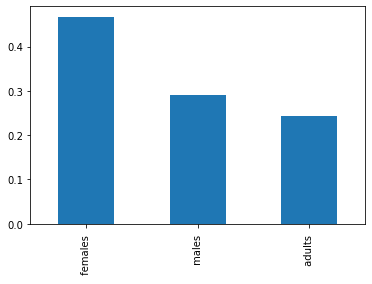

In [10]:
display(data['people'].unique())
data['people'].value_counts(normalize=True).plot(kind='bar') # in percentage of the distribution

### Obesity levels 

In [11]:
display(data['obesity_levels'].unique())
data['obesity_levels'].value_counts()

array(['obese ', 'overweight ', 'pre-obese ', 'underweight ', 'normal ',
       'moderate and severe thinness ', nan], dtype=object)

obese                            668
overweight                       646
pre-obese                        513
underweight                      438
normal                           409
moderate and severe thinness      92
Name: obesity_levels, dtype: int64

In [12]:
data['obesity_levels'] = data['obesity_levels'].fillna(0)

In [13]:
display(data['obesity_level_percentage'].unique())
data['obesity_level_percentage'].value_counts()

array(['>=30.0', '>=25.0', '25.0-29.99', '<18.5', '18.5-24.99', '<=17',
       nan], dtype=object)

>=30.0        668
>=25.0        646
25.0-29.99    513
<18.5         438
18.5-24.99    409
<=17           92
Name: obesity_level_percentage, dtype: int64

In [14]:
data['obesity_level_percentage'] = data['obesity_level_percentage'].fillna(0)

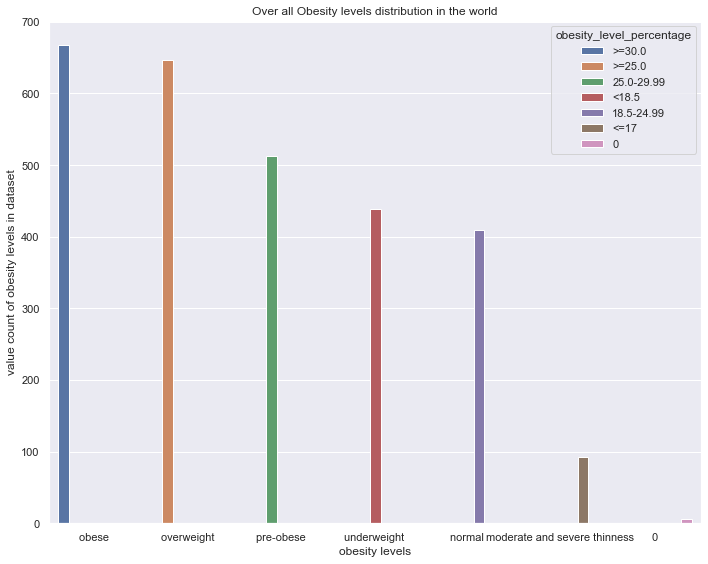

In [15]:
sns.set()
plt.figure(figsize=(10,8))
sns.countplot(data=data, x="obesity_levels", hue="obesity_level_percentage")
plt.title("Over all Obesity levels distribution in the world")
plt.ylabel("value count of obesity levels in dataset")
plt.xlabel("obesity levels")
plt.tight_layout()
plt.show()

### Date

In [16]:
data['date'].describe().T

count    2766.000000
mean     1749.561099
std       666.359650
min         2.000000
25%      2001.000000
50%      2003.000000
75%      2005.000000
max      2009.000000
Name: date, dtype: float64

In [17]:
data['date'] = data['date'].fillna(2004)

In [18]:
data['date'] = data['date'].astype(int)

In [19]:
data['date'] = data['date'].replace(2,2000)

In [20]:
display(data['date'].unique())
data['date'].value_counts(ascending=True)

array([2004, 2007, 2005, 2000, 2001, 1999, 2008, 2006, 2003, 2002, 2009])

2009     33
2008     98
2007    203
2001    235
2006    270
1999    285
2005    289
2002    304
2003    333
2000    351
2004    371
Name: date, dtype: int64

In [21]:
# trends of top 5 countries between 1999 to 2009 

In [22]:
data = data[(data.T != 0).any()]

Observation:
1. The obesity levels have been recorded sporadically through the decade for different countries.
2. i will drop the countries with less than 1 recording of the obesity type

In [23]:
data['people'] = data['people'].str.replace("adults","general")

#### please refer to the Tableau links for more information given below:
1. https://public.tableau.com/views/eda_of_obesity_by_country_5/Obesityconditionsperyear?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
2. https://public.tableau.com/views/eda_of_obesity_by_country_4/Obesitylevelsin10yearstimebycountry?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
3. https://public.tableau.com/views/eda_of_obesity_by_country_2/frequencyofobesitylevelsrecordednthedecade?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
4. https://public.tableau.com/views/eda_of_obesity_by_country/obesitylevelsbycountries?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

### Breaking down countrywise

In [157]:
#declarations
risk_values = ["obese ","overweight "]
obesity = ["obese "]
overweight = ["overweight "]

### Australia

In [243]:
def save_plot(X,country):
    savefile = country + str(X) + '.png'   # file might need to be replaced by a string
    plt.savefig(savefile)        

In [244]:
def count_plots(X,df,country):
    # count plot on two categorical variable
    
    sns.set()
    plt.figure(figsize=(5,5))
    sns.countplot(x=X, data = df) 
    plt.tight_layout()
    save_plot(X,country)
    plt.show()

In [245]:
def risks_country(country):
    aus_df = data.loc[data['country'].isin([country])]
    aus_df = aus_df.drop('Unnamed: 0', axis=1)
    aus_df = aus_df.sort_values('date')
    aus_df.to_csv("C:/Users/Admin/Documents/ironhack/certification_project/notebooks/aus_df.csv")
    print("================Over all obesity levels distribution==========================")
    print(aus_df['obesity_levels'].value_counts(normalize=True))
    aus_risk_df = aus_df.loc[aus_df['obesity_levels'].isin(risk_values)]
    aus_risk_df.to_csv("C:/Users/Admin/Documents/ironhack/certification_project/notebooks/aus_risk_df.csv")
    print("risk distribution")
    count_plots('obesity_levels',aus_risk_df,country)
    print("========================== Obesity condition===================================")
    aus_obese = aus_df.loc[aus_df['obesity_levels'].isin(obesity)]
    aus_obese.to_csv("C:/Users/Admin/Documents/ironhack/certification_project/notebooks/aus_obese.csv")
    print("over the years")
    #aus_obese['date'].value_counts().plot(kind = 'bar')
    count_plots('date',aus_obese,country)
    print("over the genders")
    #aus_obese['people'].value_counts(normalize=True).plot(kind='bar') # in percentage of the distribution
    count_plots('people',aus_obese,country)
    print("========================== Overweight condition===================================")
    aus_ow = aus_df.loc[aus_df['obesity_levels'].isin(overweight)]
    aus_ow.to_csv("C:/Users/Admin/Documents/ironhack/certification_project/notebooks/aus_ow.csv")
    count_plots('date',aus_ow,country)
    count_plots('people',aus_ow,country)
    
    
    #aus_ow['date'].value_counts().plot(kind = 'bar')
    #aus_ow['people'].value_counts(normalize=True).plot(kind='bar') 

================Over all obesity levels distribution==========================
overweight      0.279412
obese           0.279412
normal          0.147059
underweight     0.147059
pre-obese       0.147059
Name: obesity_levels, dtype: float64
risk distribution


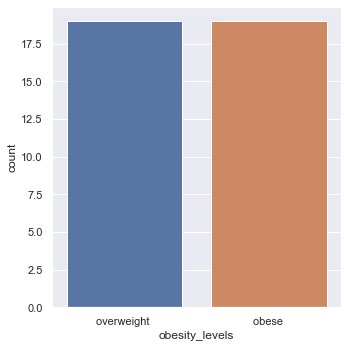

========================== Obesity condition===================================
over the years


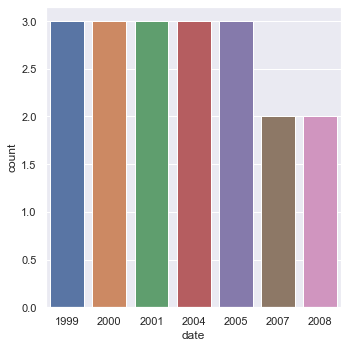

over the genders


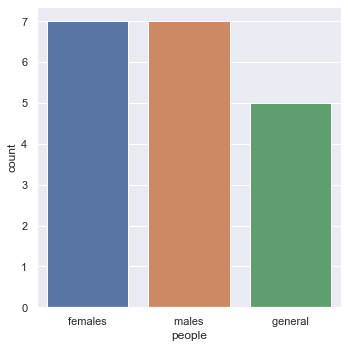

========================== Overweight condition===================================


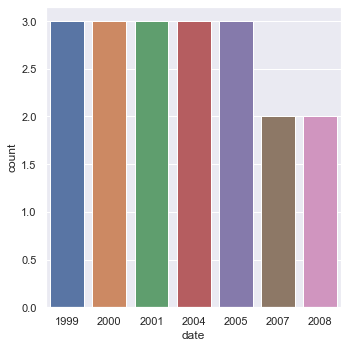

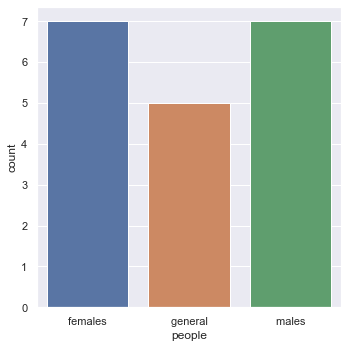

In [246]:
risks_country('Australia')

### Austria

================Over all obesity levels distribution==========================
normal          0.2
overweight      0.2
pre-obese       0.2
underweight     0.2
obese           0.2
Name: obesity_levels, dtype: float64
risk distribution


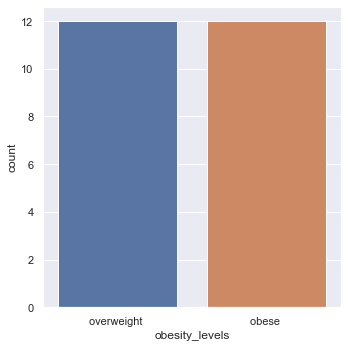

========================== Obesity condition===================================
over the years


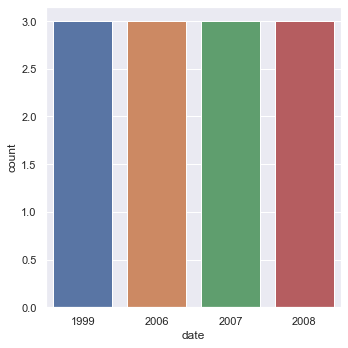

over the genders


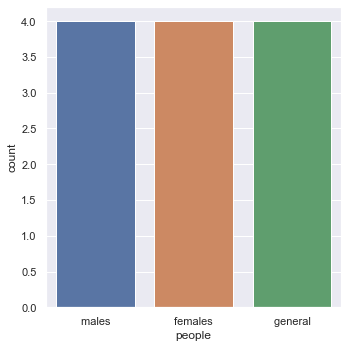

========================== Overweight condition===================================


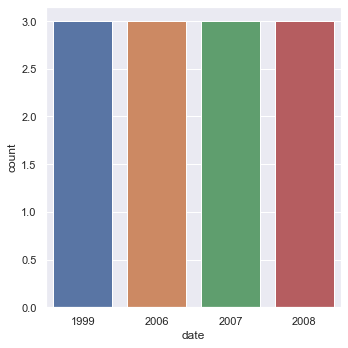

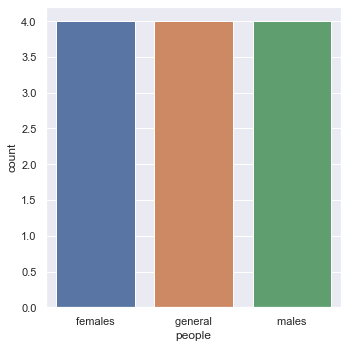

In [247]:
risks_country('Austria')

### Canada

================Over all obesity levels distribution==========================
obese           0.274194
overweight      0.241935
pre-obese       0.193548
normal          0.145161
underweight     0.145161
Name: obesity_levels, dtype: float64
risk distribution


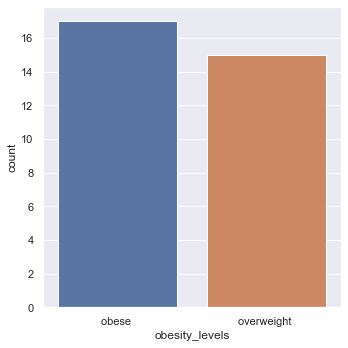

========================== Obesity condition===================================
over the years


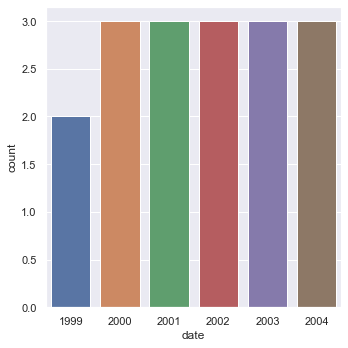

over the genders


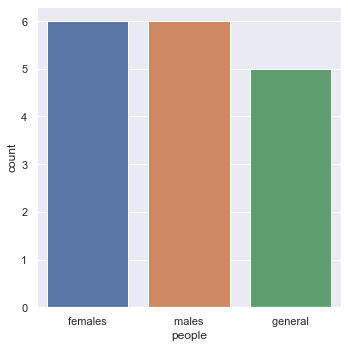

========================== Overweight condition===================================


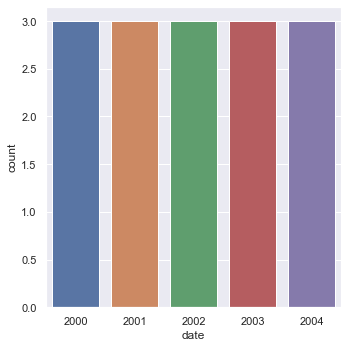

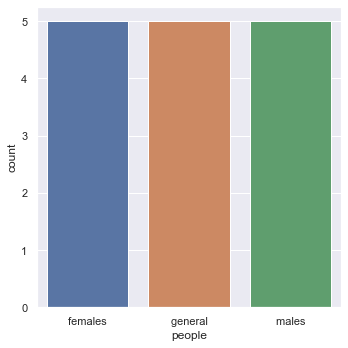

In [248]:
risks_country('Canada')

### USA

================Over all obesity levels distribution==========================
obese           0.260870
overweight      0.260870
pre-obese       0.217391
normal          0.130435
underweight     0.130435
Name: obesity_levels, dtype: float64
risk distribution


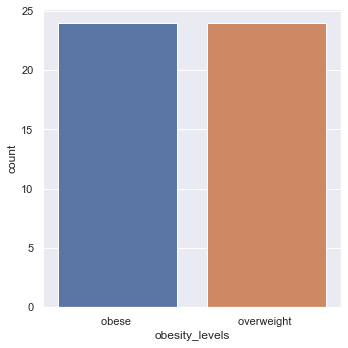

========================== Obesity condition===================================
over the years


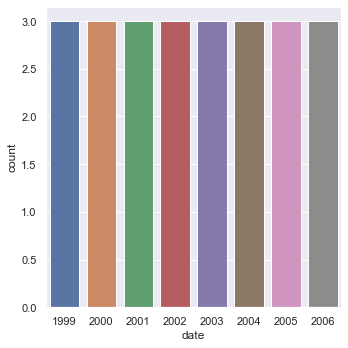

over the genders


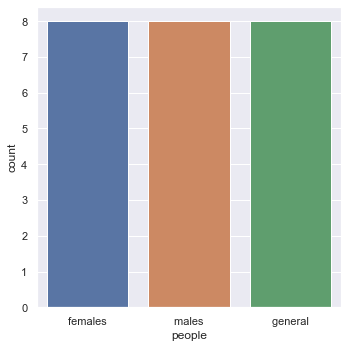

========================== Overweight condition===================================


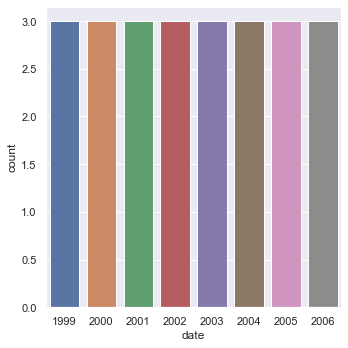

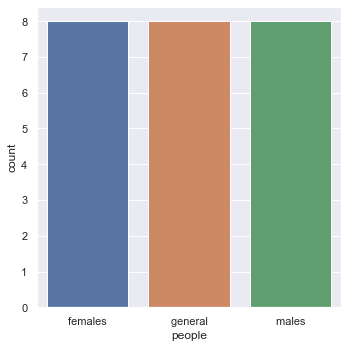

In [249]:
risks_country('United States of America')

### Norway

================Over all obesity levels distribution==========================
obese                            0.24
normal                           0.16
pre-obese                        0.16
underweight                      0.16
overweight                       0.16
moderate and severe thinness     0.12
Name: obesity_levels, dtype: float64
risk distribution


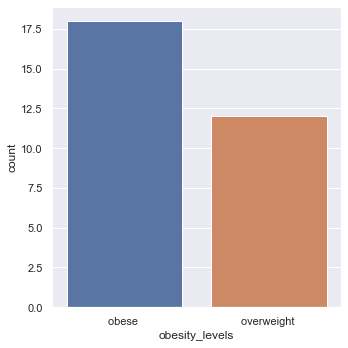

========================== Obesity condition===================================
over the years


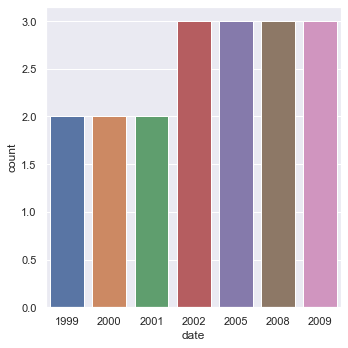

over the genders


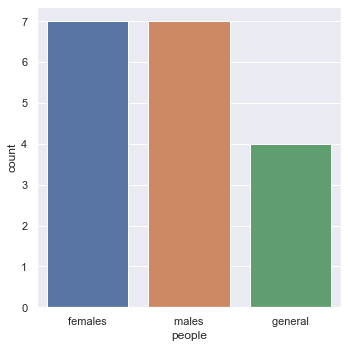

========================== Overweight condition===================================


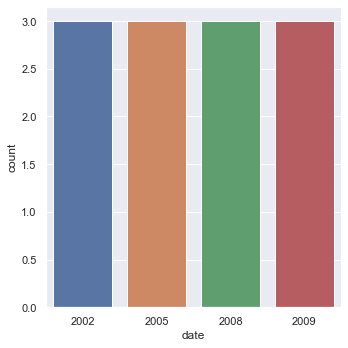

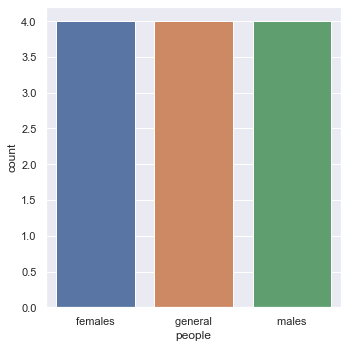

In [188]:
risks_country('Norway')

#### Question can we predict something for the coming years?

In [24]:
#data.to_csv("C:/Users/Admin/Documents/ironhack/certification_project/notebooks/basic_eda.csv")